## Continuing exploration of Clara's limlam

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]

In [2]:
m_new = lim('Lichen',doSim=True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
m_new.beam_FWHM/m_new.beam_width

<Quantity 2.35460325>

In [4]:
np.sqrt(m_new.Npix)

<Quantity 353.>

In [5]:
pix_new = m_new.maps

Loading .npz catalogues...
(31640642,)
M
(31640642,)
(31640642,)
chi
(31640642,)
(31640642,)
copy
(31640642,)
dec
(31640642,)
(31640642,)
nhalo
(31640642,)
ra
(31640642,)
(31640642,)
redshift
(31640642,)
(31640642,)
vx
(31640642,)
(31640642,)
vy
(31640642,)
(31640642,)
vz
(31640642,)
(31640642,)
x_pos
(31640642,)
(31640642,)
y_pos
(31640642,)
(31640642,)
z_pos
(31640642,)
(31640642,)
zformation
(31640642,)


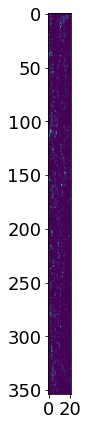

In [6]:
plt.imshow(pix_new[:,:,1].value)
#plt.xlim([0, 50])
#plt.ylim([0, 50])
#plt.savefig('first_map.pdf')
plt.figure()
plt.imshow(pix_new[1,:,:].value)

## Noisy CII Maps

In [2]:
from scipy.ndimage import gaussian_filter

In [3]:
m_noise = lim('Lichen',doSim=True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [4]:
m_noise.tobs

<Quantity 2000. h>

In [5]:
noisy_2 = m_noise.noise_added_map
nonoise_2 = m_noise.maps

Loading .npz catalogues...
14189.242531292331


In [6]:
m_noise.update(tobs=40000*u.hr)

In [7]:
m_noise.tobs

<Quantity 40000. h>

In [8]:
noisy_40 = m_noise.noise_added_map
nonoise_40 = m_noise.maps

Loading .npz catalogues...
3172.811084920084


In [9]:
m_noise.reset()

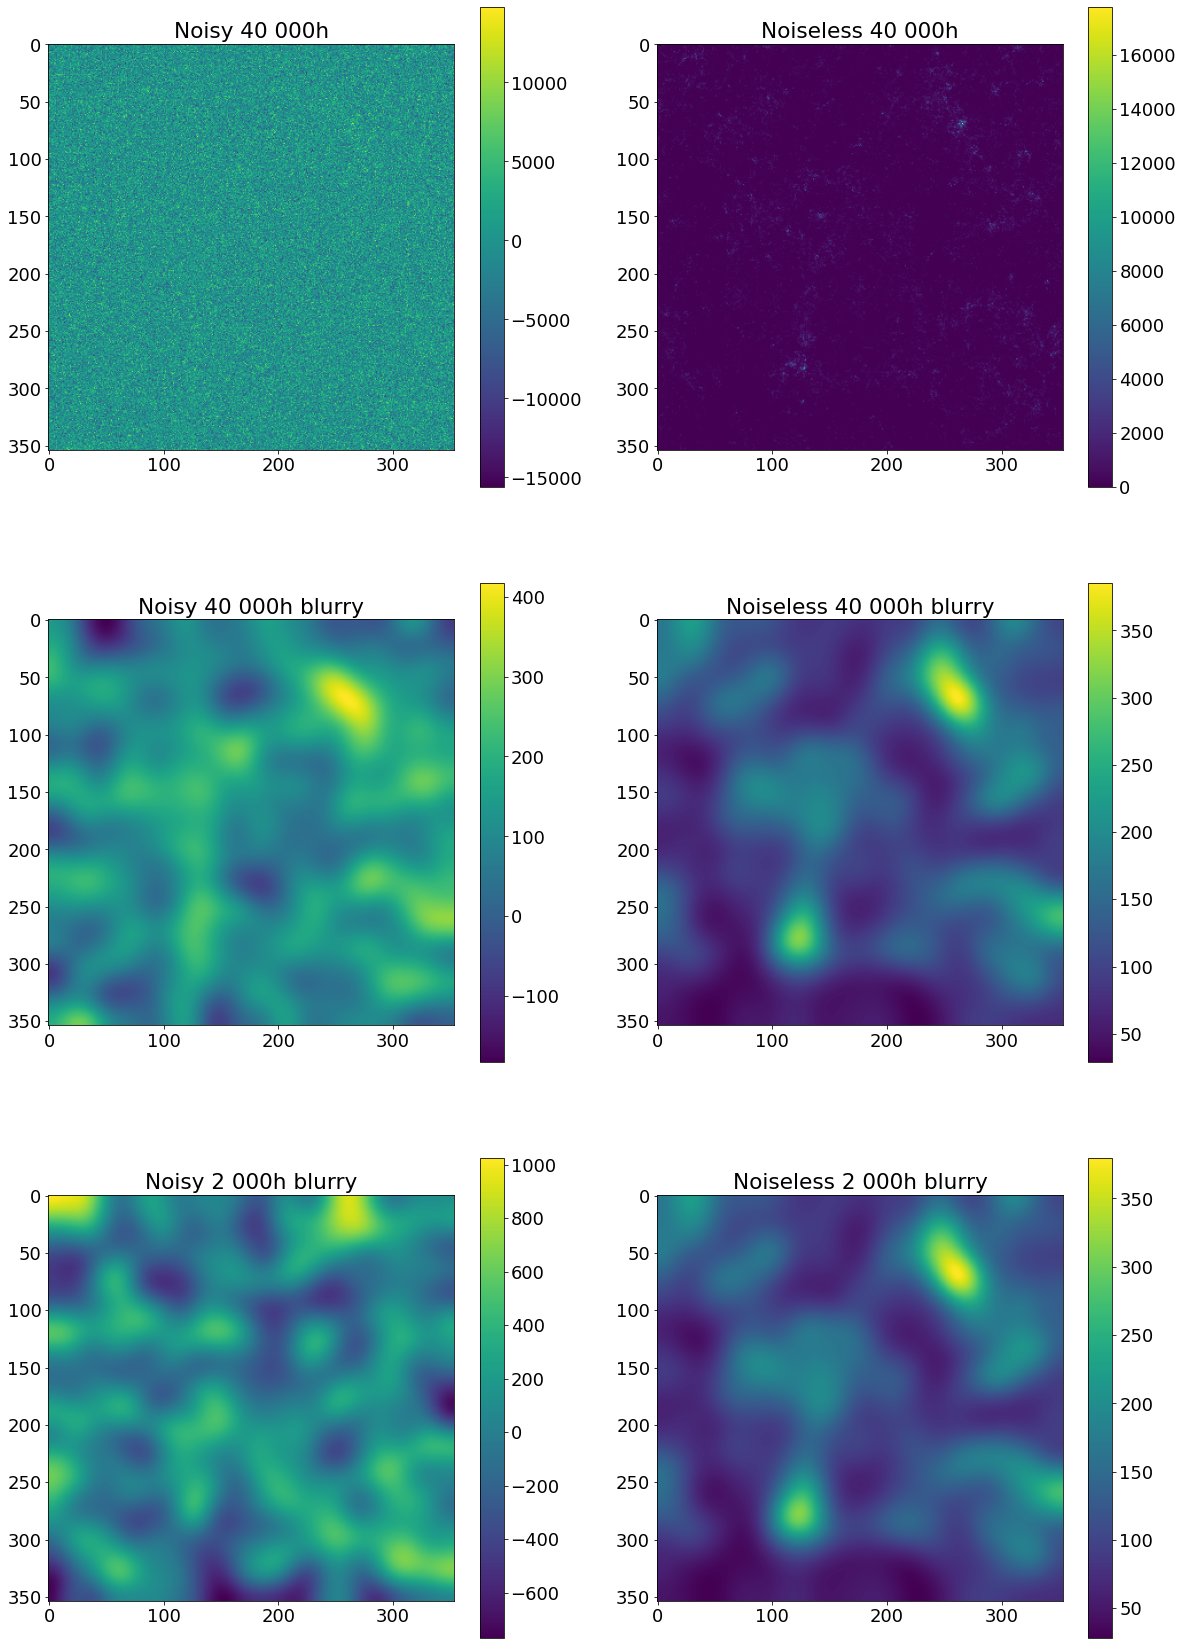

In [122]:
fig , axes = plt.subplots(nrows=3, ncols=2, figsize=(20,30))

plt.subplot(321)
plt.imshow(noisy_40[:,:,3]) 
plt.title('Noisy 40 000h') 
plt.colorbar()

plt.subplot(322)
plt.imshow(nonoise_40[:,:,3]) 
plt.title('Noiseless 40 000h')
plt.colorbar()

plt.subplot(323)
plt.imshow(gaussian_filter((noisy_40[...,3]),15)) 
plt.title('Noisy 40 000h blurry') 
plt.colorbar()

plt.subplot(324)
plt.imshow(gaussian_filter((nonoise_40[...,3]),15)) 
plt.title('Noiseless 40 000h blurry') 
plt.colorbar()

plt.subplot(325)
plt.imshow(gaussian_filter((noisy_2[...,3]),15)) 
plt.title('Noisy 2 000h blurry') 
plt.colorbar()

plt.subplot(326)
plt.imshow(gaussian_filter((nonoise_2[...,3]),15)) 
plt.title('Noiseless 2 000h blurry') 
plt.colorbar()

plt.savefig('CCATP_LCII_forecast.pdf')

In [10]:
fig , axes = plt.subplots(nrows=3, ncols=2, figsize=(20,30))

plt.subplot(321)
plt.imshow(noisy_40[:,:,3]) 
plt.title('Noisy 40 000h') 
plt.colorbar()

plt.subplot(322)
plt.imshow(nonoise_40[:,:,3]) 
plt.title('Noiseless 40 000h')
plt.colorbar()

plt.subplot(323)
plt.imshow(gaussian_filter((noisy_40[...,3]),15)) 
plt.title('Noisy 40 000h blurry') 
plt.colorbar()

plt.subplot(324)
plt.imshow(gaussian_filter((nonoise_40[...,3]),15)) 
plt.title('Noiseless 40 000h blurry') 
plt.colorbar()

plt.subplot(325)
plt.imshow(gaussian_filter((noisy_2[...,3]),15)) 
plt.title('Noisy 2 000h blurry') 
plt.colorbar()

plt.subplot(326)
plt.imshow(gaussian_filter((nonoise_2[...,3]),15)) 
plt.title('Noiseless 2 000h blurry') 
plt.colorbar()

In [11]:
np.shape(noisy_2)

(354, 354, 21)

## Stacking Analysis

In [12]:
len(m_noise.mapinst.nu_binedges)

22

In [13]:
len(m_noise.mapinst.pix_binedges_x)

355

In [14]:
len(m_noise.mapinst.pix_binedges_y)

355

In [15]:
np.shape(noisy_2)

(354, 354, 21)

In [16]:
m_noise.halos.ra

Loading .npz catalogues...


array([-0.2673638 , -0.23812449, -0.19327675, ...,  0.49945357,
        0.665098  ,  0.7317626 ], dtype=float32)

In [18]:
m_noise.halos.dec

array([0.2378719 , 0.34887347, 0.18515307, ..., 0.33753827, 0.39397362,
       0.44138384], dtype=float32)

In [157]:
# five by five cutout

## Power Spectrum

In [5]:
k_new = m_new.k_sim
Pk_new = m_new.Pk_sim
nP_new = ((k_new**3)*Pk_new)/(2*(np.pi**2))

Text(0.5, 1.0, "Preliminary power spectrum from Lichen's model")

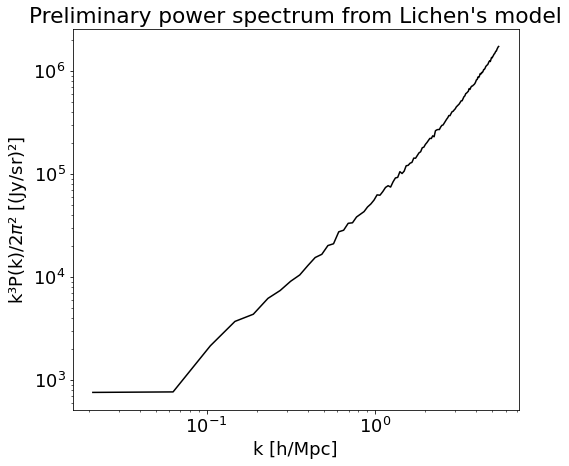

In [6]:
plt.plot(k_new/0.7, nP_new, 'k')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'k³P(k)/2$\pi$² [(Jy/sr)²]')
plt.title("Preliminary power spectrum from Lichen's model")

## Previous CO Map from Li Model

In [55]:
m1 = lim('TonyLi_PhI',doSim=True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
# Note, this cell may take a few minutes the first time
pix = m1.maps

Loading .npz catalogues...


/cita/h/home-2/horlaville/clara_limlam/limCode2020-master_clara_2/limlam_mocker/limlam_mocker/load_halos.py:251: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  setattr(halos,i,getattr(halos,i)[dm])


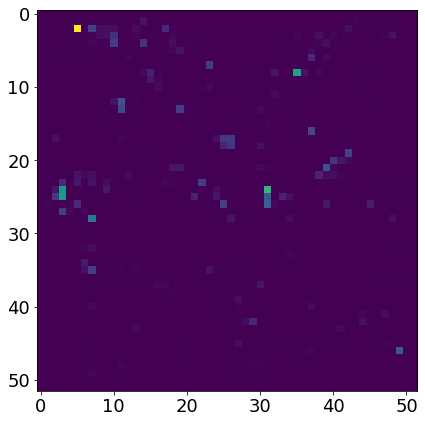

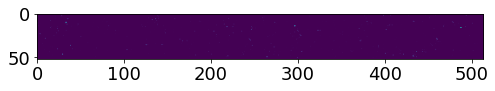

In [4]:
plt.imshow(pix[:,:,1].value)
plt.figure()
plt.imshow(pix[1,:,:].value)

## SFR / MH1 Relationship

### Step 1: Check SFR tables using limlam's data [from Behroozi]

In [2]:
M_halos = np.logspace(9, 13, 200)

In [3]:
z = np.linspace(0, 5, 6)

In [4]:
from limlam_mocker import limlam_mocker as llm
import scipy as sp
import scipy.interpolate
sigma_sfr = 0.3

In [5]:
tablepath = '/cita/h/home-2/horlaville/clara_limlam/limCode2020-master_clara_2/limlam_mocker/tables/sfr_behroozi_release.dat'

In [6]:
dat_zp1, dat_logm, dat_logsfr, _ = np.loadtxt(tablepath, unpack=True)

In [7]:
dat_logzp1 = np.log10(dat_zp1)
dat_sfr    = 10.**dat_logsfr

In [8]:
dat_logzp1  = np.unique(dat_logzp1)    # log(z), 1D 
dat_logm    = np.unique(dat_logm)    # log(Mhalo), 1D        
dat_sfr     = np.reshape(dat_sfr, (dat_logm.size, dat_logzp1.size))

In [9]:
sfr_interp_tab = sp.interpolate.RectBivariateSpline(dat_logm, dat_logzp1, dat_sfr, kx=1, ky=1)

In [10]:
z_s = [0 for i in range(len(z))]
for i in range(len(z)):
    z_s[i] = np.linspace(z[i], z[i], len(M_halos))

In [11]:
sfr = [0 for i in range(len(z))]
for i in range(len(z)):
    sfr[i] = sfr_interp_tab.ev(np.log10(M_halos), np.log10(z_s[i] + 1))
    #sfr[i] = llm.add_log_normal_scatter(sfr[i], sigma_sfr)

In [12]:
def MH1_fit(M, M_0, M_min, alpha):
    x = M/M_min
    return M_0 * (x**alpha) * np.exp(-1/(x**0.35))

In [13]:
MH1_z0 = MH1_fit(M_halos, (4.3*(10**10)), (2*(10**12)), (0.24)) 
MH1_z1 = MH1_fit(M_halos, (1.5*(10**10)), (6*(10**11)), (0.53))
MH1_z2 = MH1_fit(M_halos, (1.3*(10**10)), (3.6*(10**11)), (0.6)) 
MH1_z3 = MH1_fit(M_halos, (2.9*(10**9)), (6.7*(10**10)), (0.76)) 
MH1_z4 = MH1_fit(M_halos, (1.4*(10**9)), (2.1*(10**10)), (0.79)) 
MH1_z5 = MH1_fit(M_halos, (1.9*(10**9)), (2*(10**10)), (0.74))

MH1 = np.array([MH1_z0, MH1_z1, MH1_z2, MH1_z3, MH1_z4, MH1_z5])

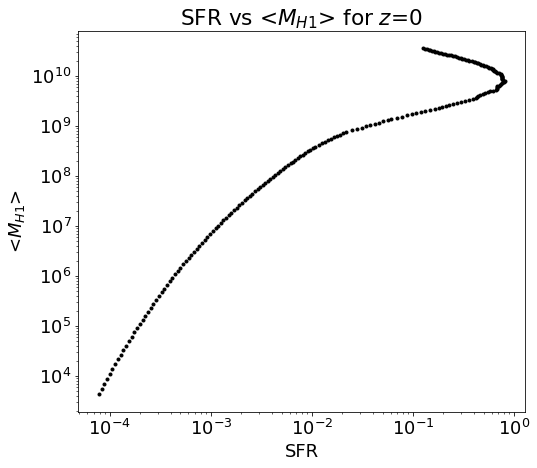

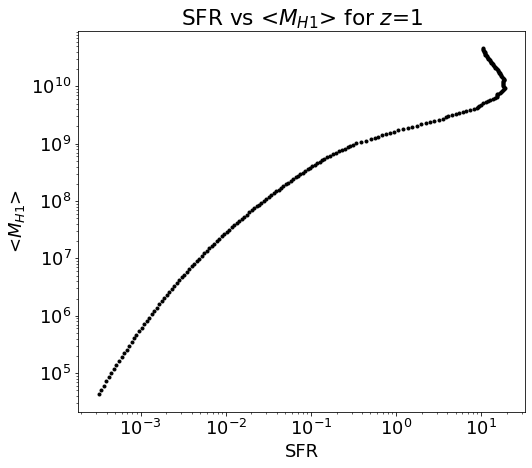

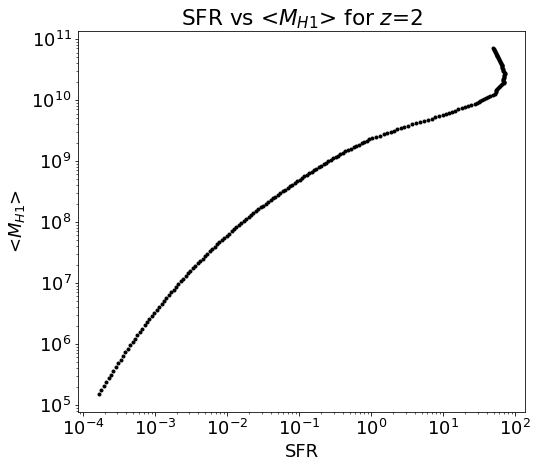

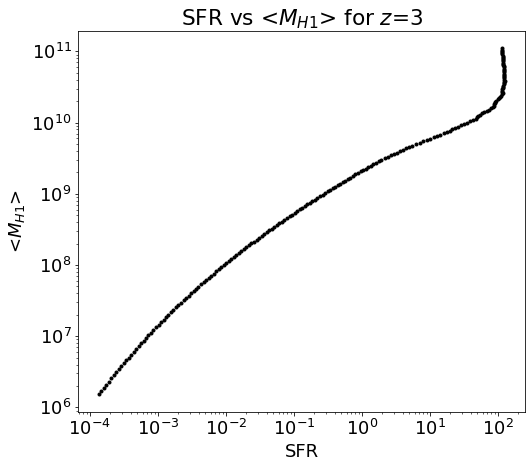

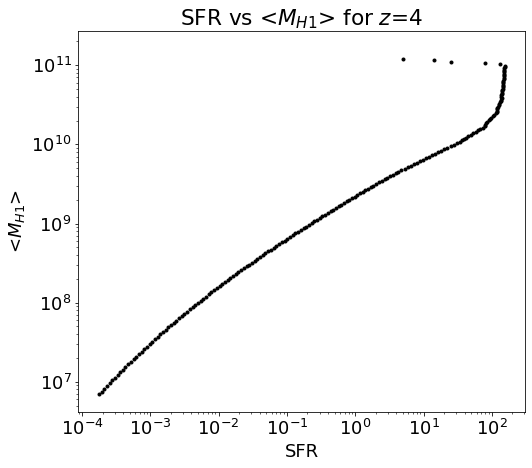

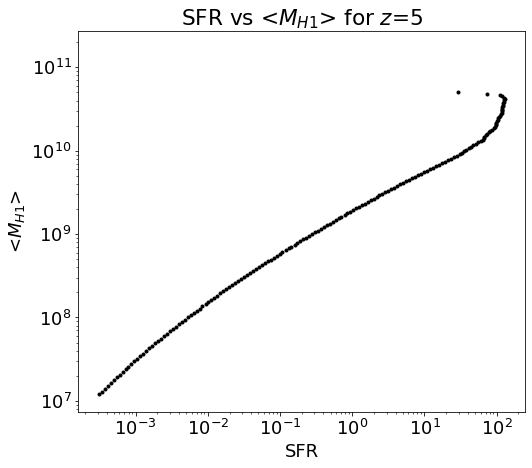

In [15]:
for i in range(len(z)):
    
    plt.figure(i)
    plt.plot(sfr[i], MH1[i], '.k')
    plt.xlabel('SFR')
    plt.ylabel(r'<$M_{H1}$>')
    plt.title(r'SFR vs <$M_{H1}$> for $z$='+str(int(z[i])))
    plt.yscale('log')
    plt.xscale('log')

/tmp/ipykernel_164216/2809573997.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1[i])))/np.diff(np.log10(sfr[i])), '.k')
/cita/modules/python/3.10.2/lib/python3.10/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_164216/2809573997.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1[i])))/np.diff(np.log10(sfr[i])), '.k')
/cita/modules/python/3.10.2/lib/python3.10/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


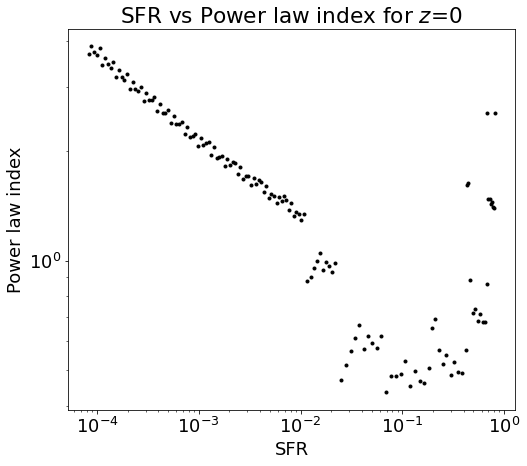

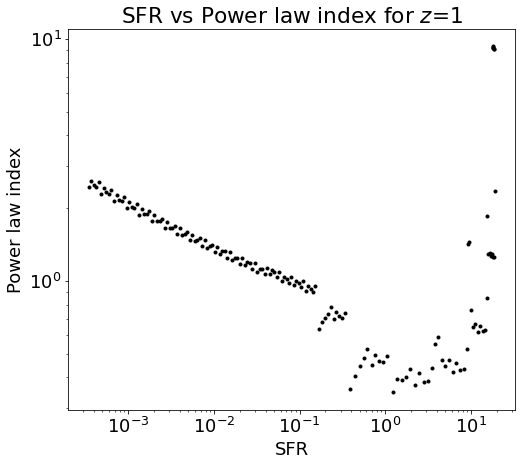

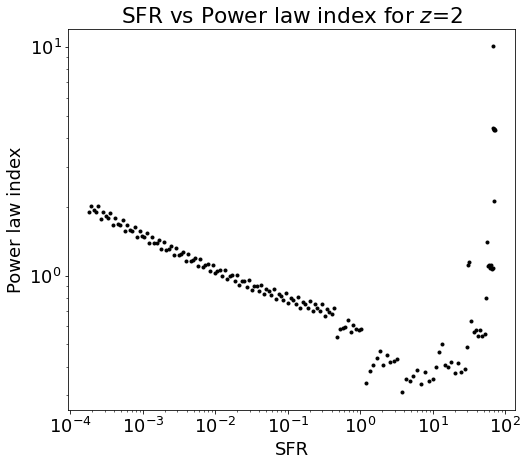

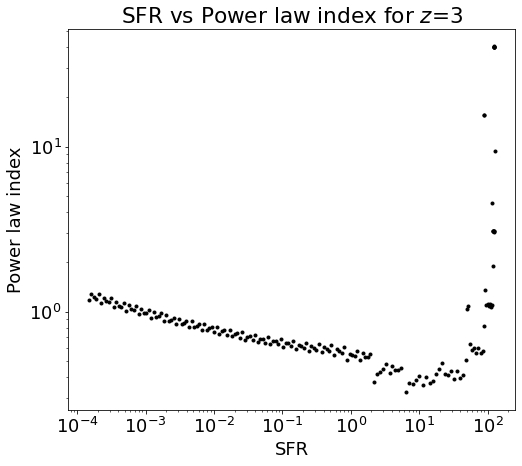

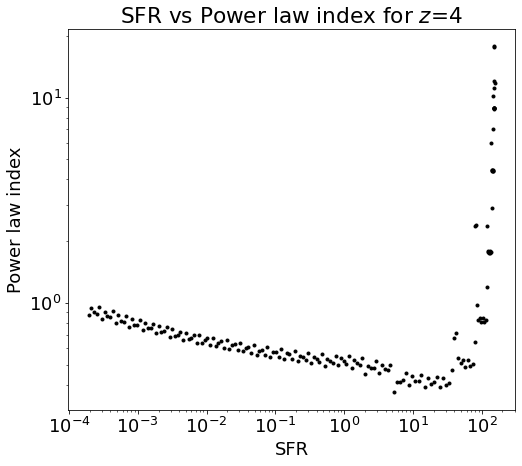

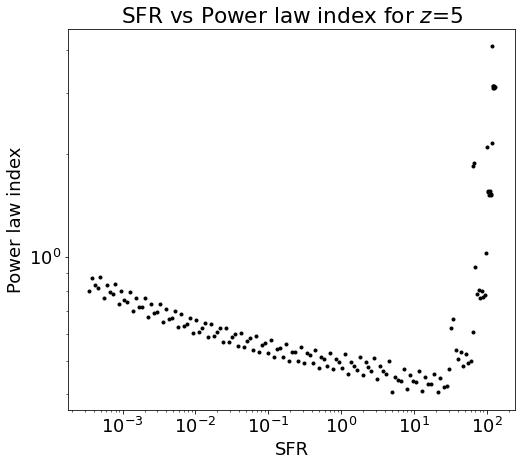

In [16]:
for i in range(len(z)):
    
    plt.figure(i)
    plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1[i])))/np.diff(np.log10(sfr[i])), '.k')
    plt.xlabel('SFR')
    plt.ylabel(r'Power law index')
    plt.title(r'SFR vs Power law index for $z$='+str(int(z[i])))
    plt.yscale('log')
    plt.xscale('log')

## Using Dongwoo's SFR function

In [17]:
from limlam_mocker.limlam_mocker.lim_lensing_predictions import unimachsfr as uni

In [18]:
sfr_d = [0 for i in range(len(z))]
for i in range(len(z)):
    sfr_d[i] = uni.sfr_from_Mh(M_halos, z_s[i], quench = False)

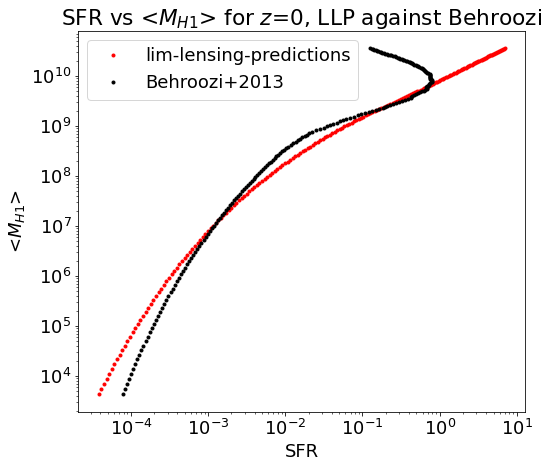

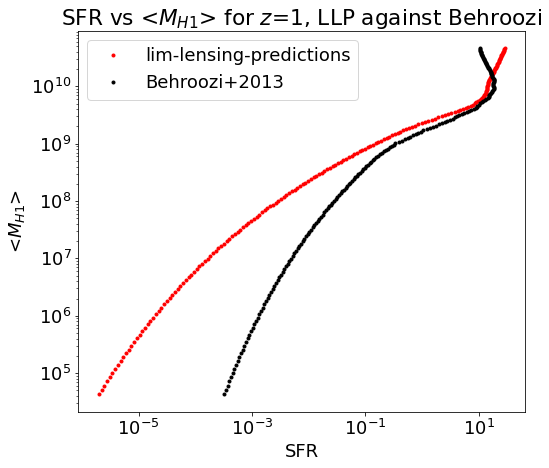

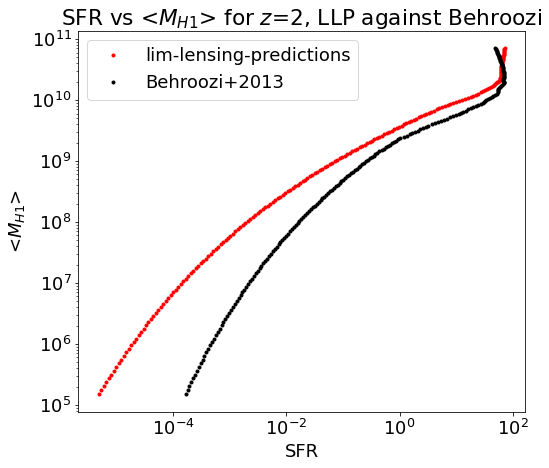

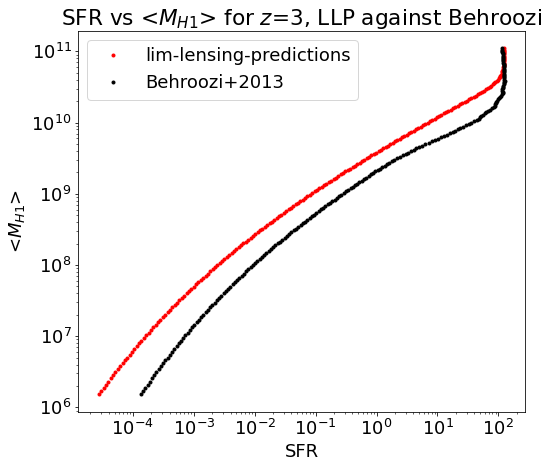

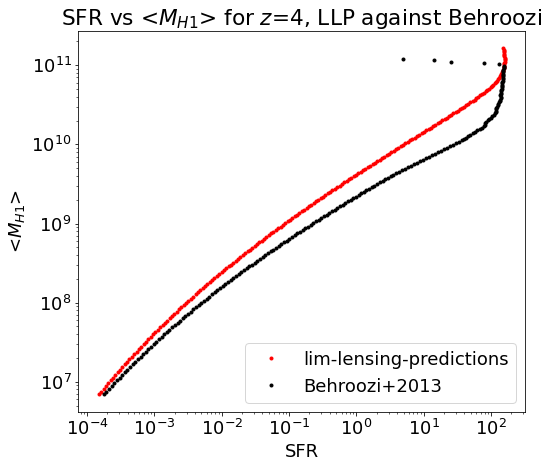

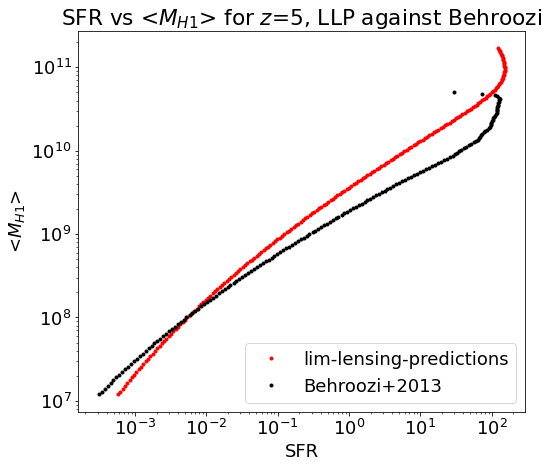

In [19]:
for i in range(len(z)):
    
    plt.figure(i)
    plt.plot(sfr_d[i], MH1[i], '.r', label='lim-lensing-predictions')
    plt.plot(sfr[i], MH1[i], '.k', label='Behroozi+2013')
    plt.xlabel('SFR')
    plt.ylabel(r'<$M_{H1}$>')
    plt.title(r'SFR vs <$M_{H1}$> for $z$='+str(int(z[i]))+', LLP against Behroozi')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()

/tmp/ipykernel_164216/3018898414.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1[i])))/np.diff(np.log10(sfr[i])), '.k', label='Behroozi')
/cita/modules/python/3.10.2/lib/python3.10/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_164216/3018898414.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1[i])))/np.diff(np.log10(sfr[i])), '.k', label='Behroozi')
/cita/modules/python/3.10.2/lib/python3.10/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


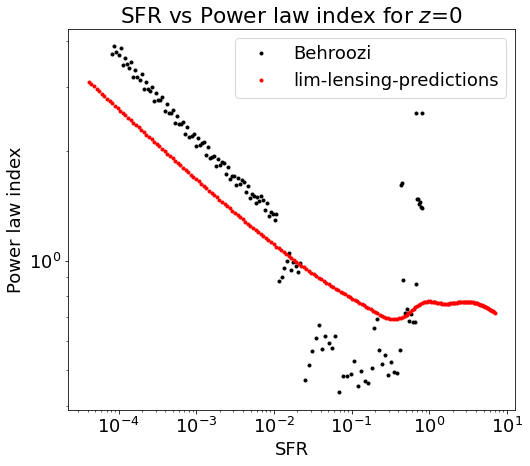

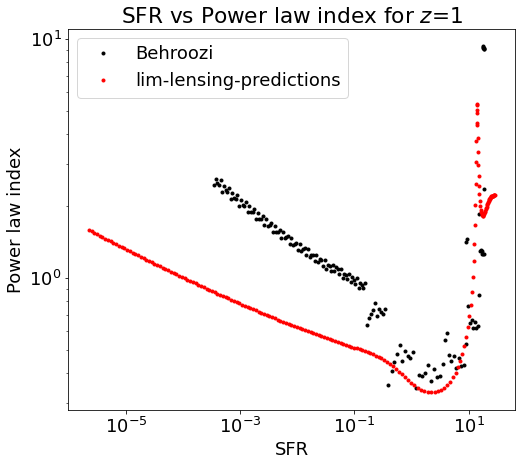

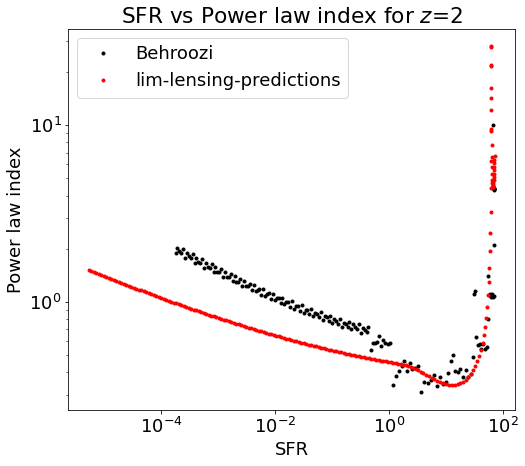

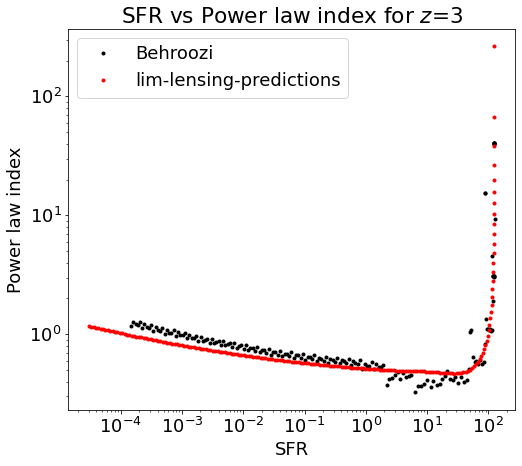

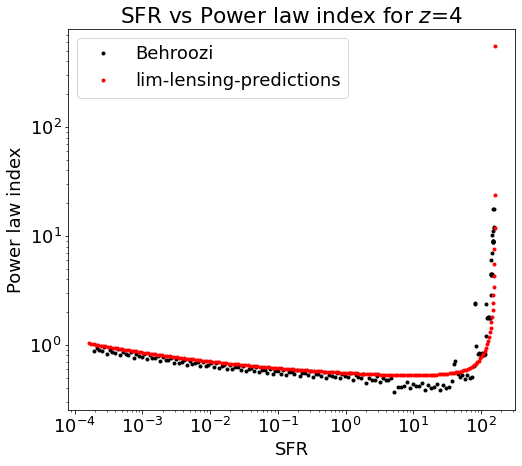

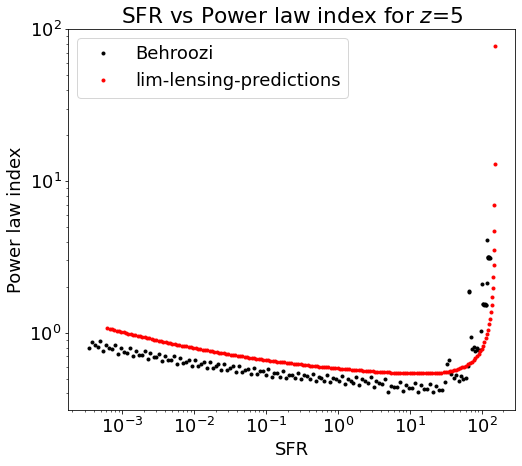

In [20]:
for i in range(len(z)):
    
    plt.figure(i)
    plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1[i])))/np.diff(np.log10(sfr[i])), '.k', label='Behroozi')
    plt.plot(np.delete(sfr_d[i], 0), (np.diff(np.log10(MH1[i])))/np.diff(np.log10(sfr_d[i])), '.r', label='lim-lensing-predictions')
    plt.xlabel('SFR')
    plt.ylabel(r'Power law index')
    plt.title(r'SFR vs Power law index for $z$='+str(int(z[i])))
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()

## Using FoF-SO fit parameters for MH1

FoF = Friends-of-Friends (algorithm)

FoF-SO = Friends-of-Friends "Spherical Overdensity"

FoF halos = general dark matter halos

FoF-SO halos = halo corresponding to its "virial" radius, which is found from its mass, with $M = (4\pi /3) \cdot \Delta_c \rho_c R³$, where $\Delta_c$ is the fraction of the Universe's critical density $\rho_c$ that corresponds to the halo's mean density. It is found to be the solution of some polynomial equation, cf Figure 29 and section 2.1 from Paco paper (https://arxiv.org/pdf/1804.09180.pdf)

The paper refers two sets of parameters' values for the fitting of the MH1 function, depending on which types of halos are being considered. As shown in Figure 29, FoF-SO halos may be missing out a signficant part of the H1 mass from the "actual" halo. This spherical approximation has its limits. Therefore, I expect this estimate to be either accurate to FoF halos' results, or it might underestimate total H1 mass, in which case the modeling becomes less accurate. So, even a signifcant discrepancy with the FoF halos' results does not tell anything significant but that the FoF-SO halos' model might not be as accurate.

In [21]:
MH1_z0_SO = MH1_fit(M_halos, (4.1*(10**10)), (2.4*(10**12)), (0.16)) 
MH1_z1_SO = MH1_fit(M_halos, (1.8*(10**10)), (8.6*(10**11)), (0.43))
MH1_z2_SO = MH1_fit(M_halos, (1.5*(10**10)), (4.6*(10**11)), (0.51)) 
MH1_z3_SO = MH1_fit(M_halos, (3.7*(10**9)), (9.6*(10**10)), (0.69)) 
MH1_z4_SO = MH1_fit(M_halos, (4.5*(10**9)), (7.6*(10**10)), (0.61)) 
MH1_z5_SO = MH1_fit(M_halos, (4.1*(10**9)), (5.4*(10**10)), (0.59))

MH1_SO = np.array([MH1_z0_SO, MH1_z1_SO, MH1_z2_SO, MH1_z3_SO, MH1_z4_SO, MH1_z5_SO])

## Comparing now with Behroozi's SFR & Dongwoo's SFR:

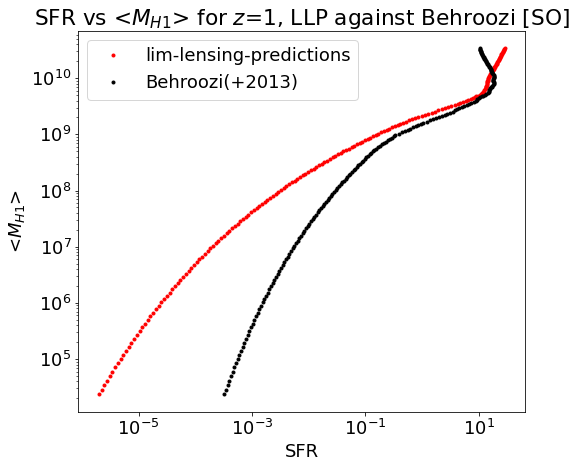

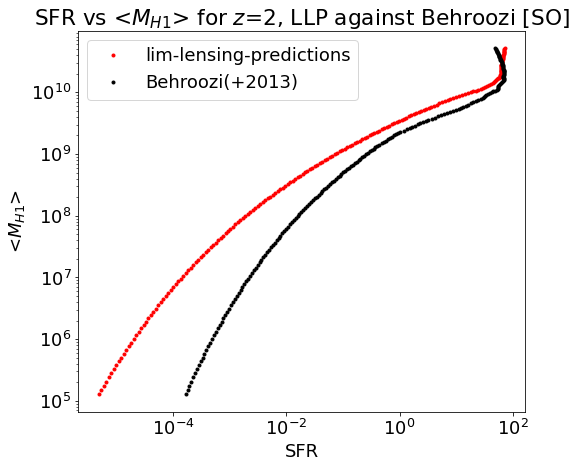

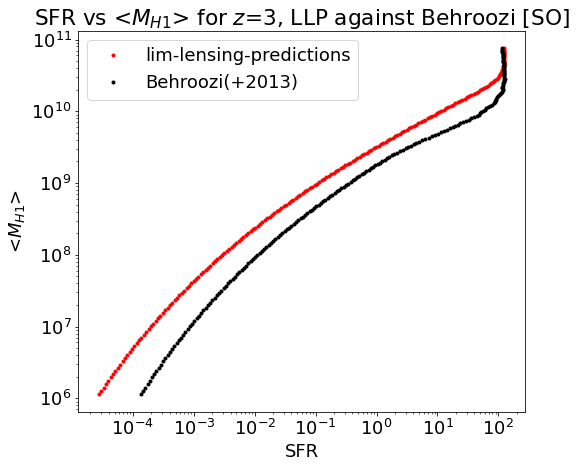

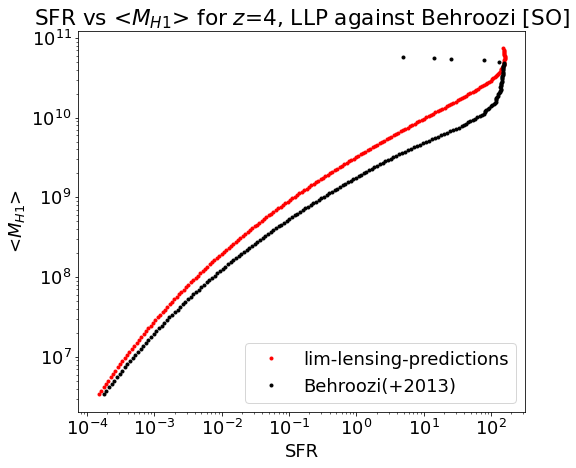

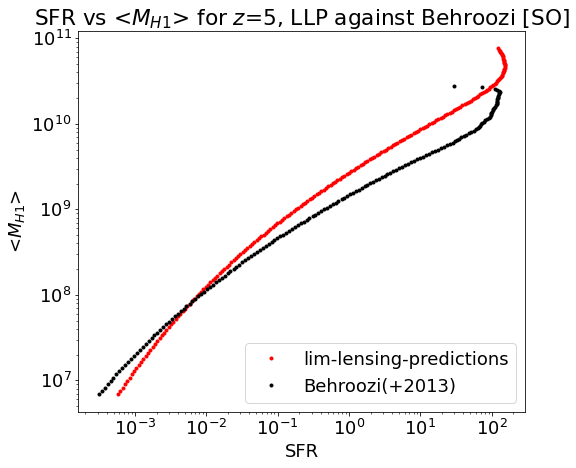

In [22]:
for i in range(len(z)):
    
    plt.figure(i)
    plt.plot(sfr_d[i], MH1_SO[i], '.r', label='lim-lensing-predictions')
    plt.plot(sfr[i], MH1_SO[i], '.k', label='Behroozi(+2013)')
    plt.xlabel('SFR')
    plt.ylabel(r'<$M_{H1}$>')
    plt.title(r'SFR vs <$M_{H1}$> for $z$='+str(int(z[i]))+', LLP against Behroozi [SO]')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()

/tmp/ipykernel_164216/2426087394.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1_SO[i])))/np.diff(np.log10(sfr[i])), '.k', label='Behroozi(+2013)')
/cita/modules/python/3.10.2/lib/python3.10/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_164216/2426087394.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1_SO[i])))/np.diff(np.log10(sfr[i])), '.k', label='Behroozi(+2013)')
/cita/modules/python/3.10.2/lib/python3.10/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


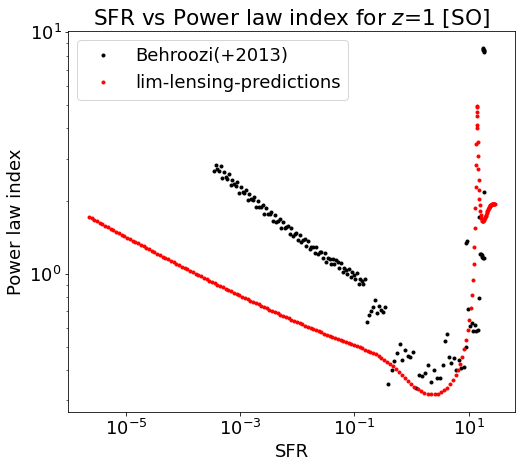

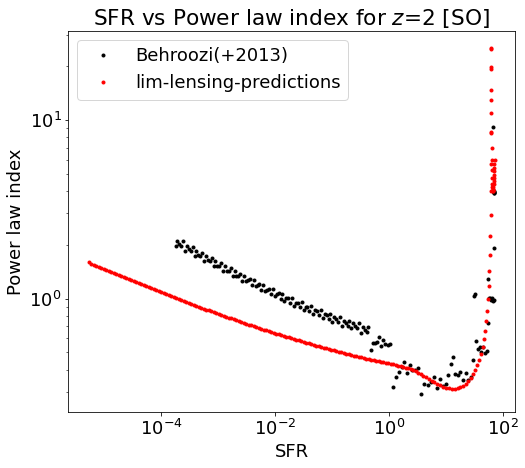

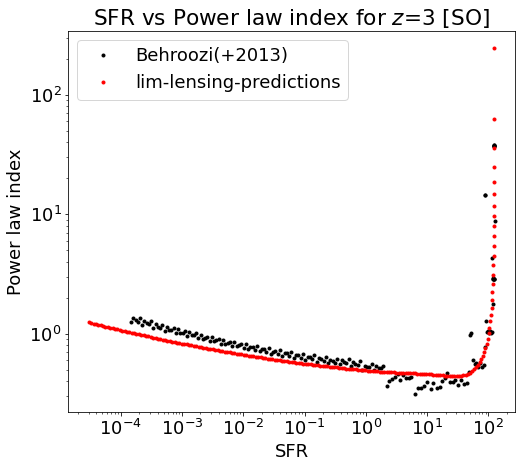

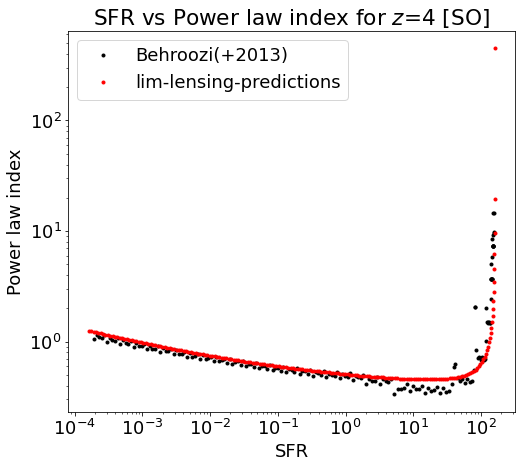

In [23]:
for i in range(len(z)):
    
    plt.figure(i)
    plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1_SO[i])))/np.diff(np.log10(sfr[i])), '.k', label='Behroozi(+2013)')
    plt.plot(np.delete(sfr_d[i], 0), (np.diff(np.log10(MH1_SO)[i]))/np.diff(np.log10(sfr_d[i])), '.r', label='lim-lensing-predictions')
    plt.xlabel('SFR')
    plt.ylabel(r'Power law index')
    plt.title(r'SFR vs Power law index for $z$='+str(int(z[i]))+' [SO]')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()

## Comparing FoF & FoF-SO

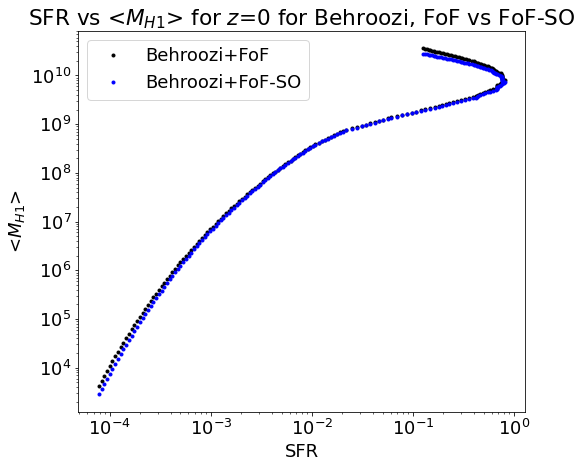

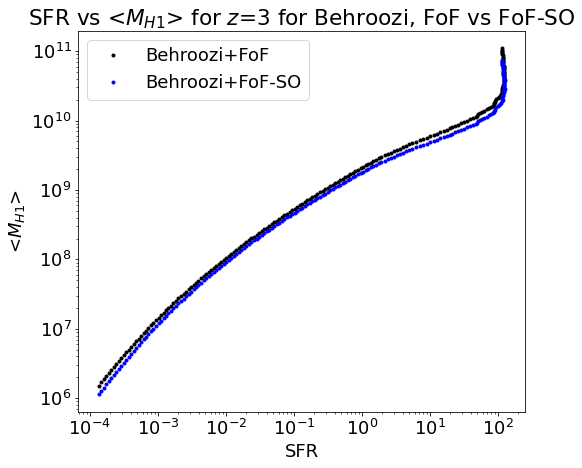

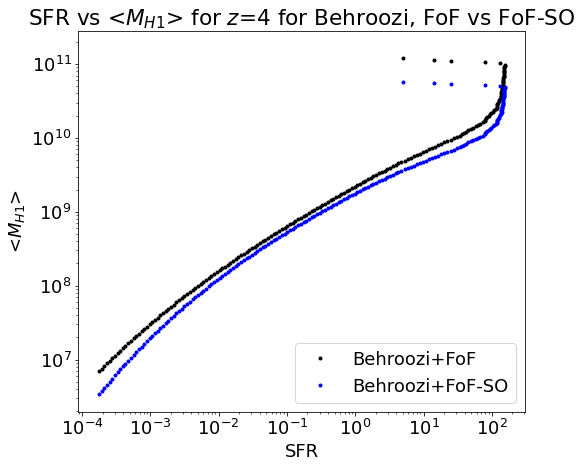

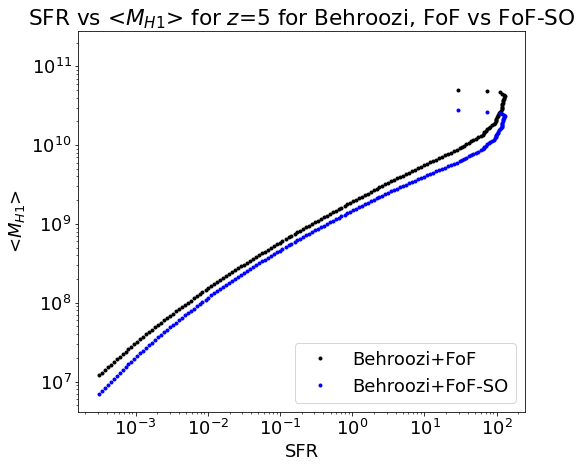

In [24]:
for i in range(len(z)):
    
    plt.figure(i)
    plt.plot(sfr[i], MH1[i], '.k', label='Behroozi+FoF')
    plt.plot(sfr[i], MH1_SO[i], '.b', label='Behroozi+FoF-SO')
    plt.xlabel('SFR')
    plt.ylabel(r'<$M_{H1}$>')
    plt.title(r'SFR vs <$M_{H1}$> for $z$='+str(int(z[i]))+' for Behroozi, FoF vs FoF-SO')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()

In [25]:
for i in range(len(z)):
    
    plt.figure(i)
    plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1[i])))/np.diff(np.log10(sfr[i])), '.k', label='Behroozi+FoF')
    plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1_SO[i])))/np.diff(np.log10(sfr[i])), '.b', label='Behroozi+FoF-SO')
    plt.xlabel('SFR')
    plt.ylabel(r'Power law index')
    plt.title(r'SFR vs Power law index for $z$='+str(int(z[i]))+' for Behroozi, FoF vs FoF-SO')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()

/tmp/ipykernel_164216/3811140807.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1[i])))/np.diff(np.log10(sfr[i])), '.k', label='Behroozi+FoF')
/cita/modules/python/3.10.2/lib/python3.10/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_164216/3811140807.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1_SO[i])))/np.diff(np.log10(sfr[i])), '.b', label='Behroozi+FoF-SO')
/cita/modules/python/3.10.2/lib/python3.10/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_164216/3811140807.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.delete(sfr[i], 0), (np.diff(np.log10(MH1[i])))/np.diff(np.log10(sfr[i])), '.k', label='Behroozi+FoF')
/cita/modules/python/3.

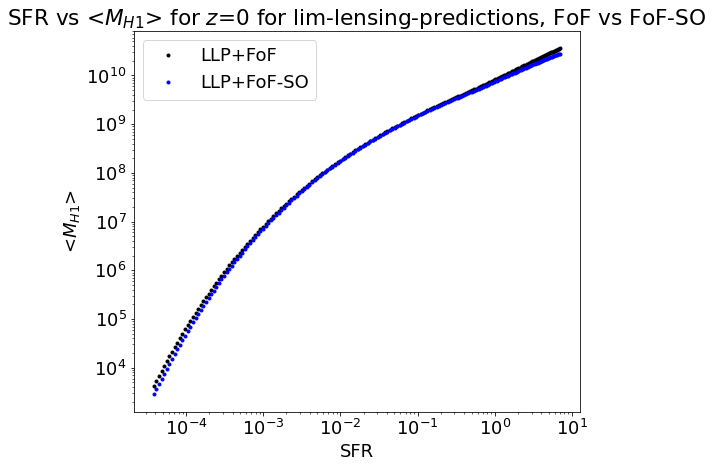

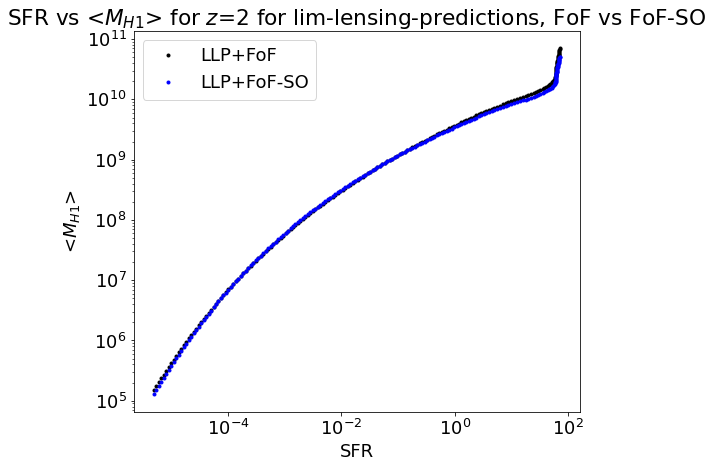

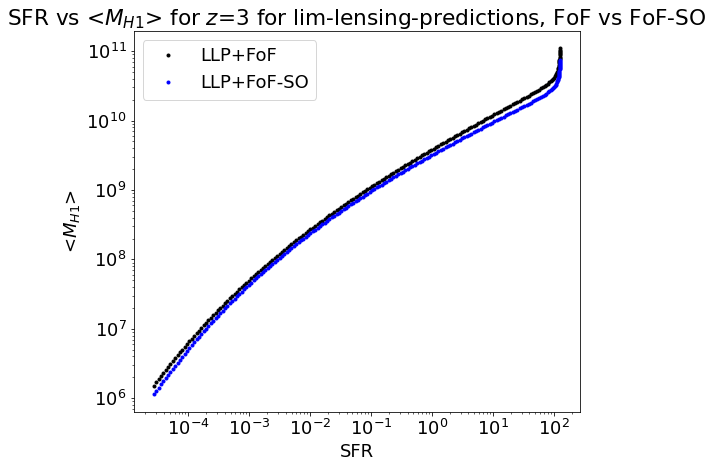

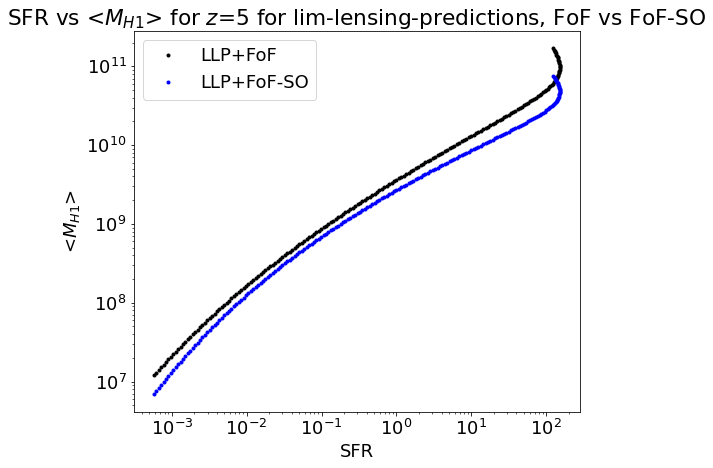

In [26]:
for i in range(len(z)):
    
    plt.figure(i)
    plt.plot(sfr_d[i], MH1[i], '.k', label='LLP+FoF')
    plt.plot(sfr_d[i], MH1_SO[i], '.b', label='LLP+FoF-SO')
    plt.xlabel('SFR')
    plt.ylabel(r'<$M_{H1}$>')
    plt.title(r'SFR vs <$M_{H1}$> for $z$='+str(int(z[i]))+' for lim-lensing-predictions, FoF vs FoF-SO')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()

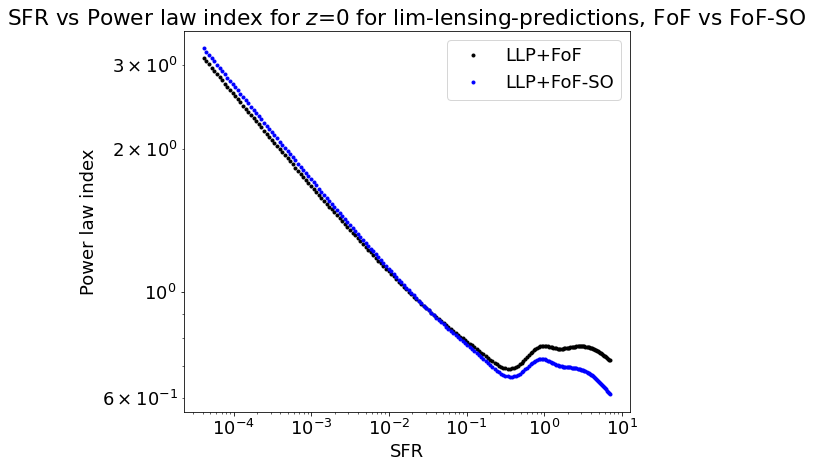

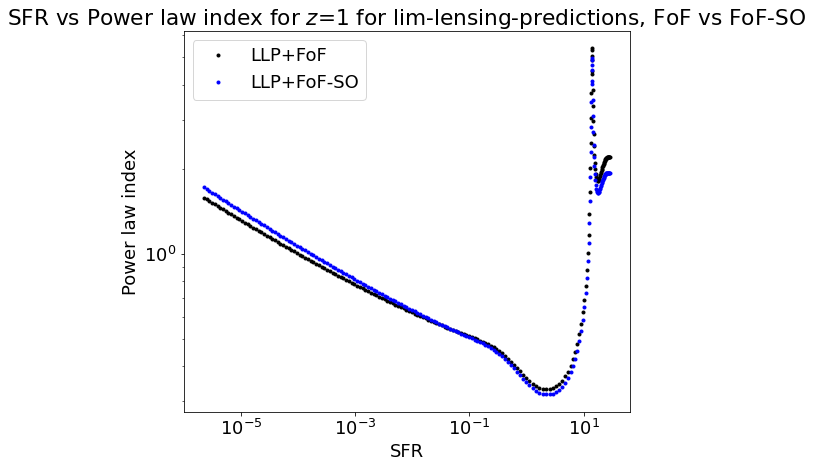

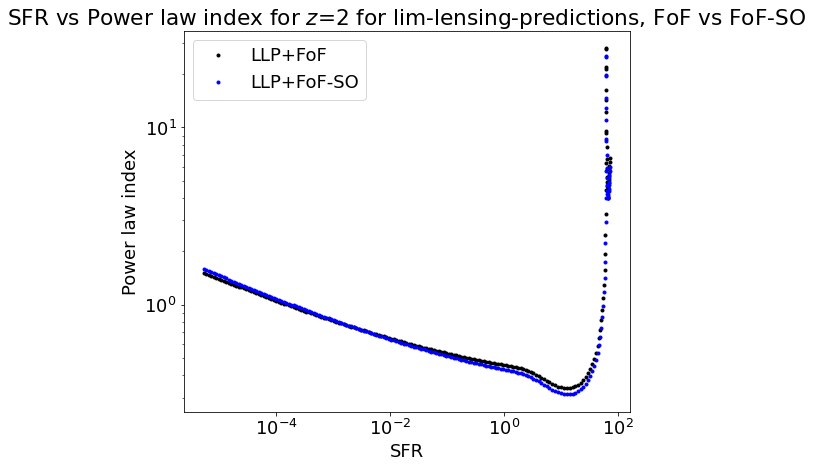

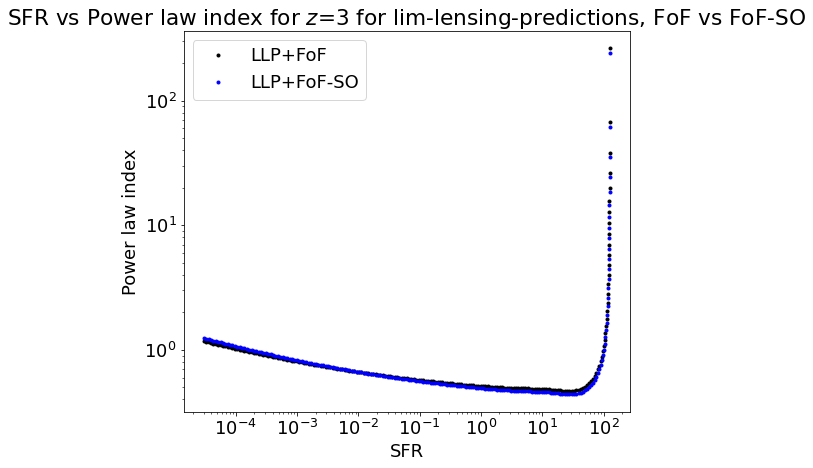

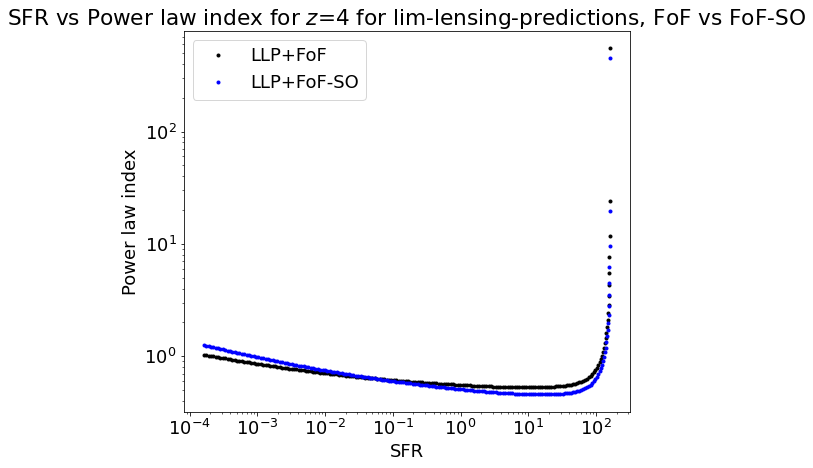

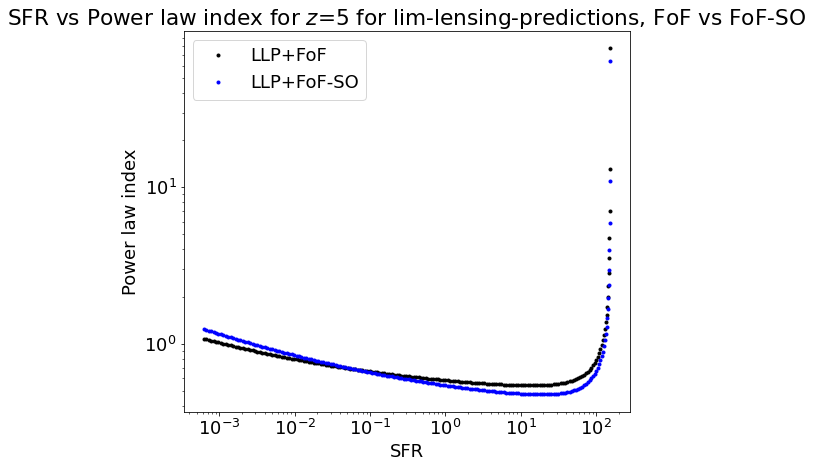

In [27]:
for i in range(len(z)):
    
    plt.figure(i)
    plt.plot(np.delete(sfr_d[i], 0), (np.diff(np.log10(MH1[i])))/np.diff(np.log10(sfr_d[i])), '.k', label='LLP+FoF')
    plt.plot(np.delete(sfr_d[i], 0), (np.diff(np.log10(MH1_SO[i])))/np.diff(np.log10(sfr_d[i])), '.b', label='LLP+FoF-SO')
    plt.xlabel('SFR')
    plt.ylabel(r'Power law index')
    plt.title(r'SFR vs Power law index for $z$='+str(int(z[i]))+' for lim-lensing-predictions, FoF vs FoF-SO')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()

## Comparing Behroozi's and Dongwoo's SFRs as 3D maps

In [28]:
x_b_r = dat_logzp1
y_b_r = dat_logm
x_b_r, y_b_r = np.meshgrid(x_b_r, y_b_r)
z_b_r = dat_sfr

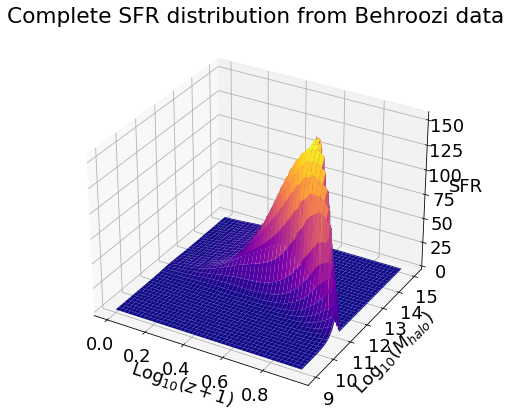

In [29]:
fig = plt.figure()

ax = fig.add_subplot(projection = '3d')
ax.plot_surface(x_b_r, y_b_r, z_b_r, cmap = "plasma")
ax.set_ylabel(r'$\rm{Log}_{10}$($M_{halo}$)')
ax.set_xlabel(r'$\rm{Log}_{10}$($z+1$)')
ax.set_zlabel('SFR')
ax.set_title('Complete SFR distribution from Behroozi data')
plt.show()

In [30]:
x_b = np.log10(z + 1)
y_b = np.log10(M_halos)
x_b, y_b = np.meshgrid(x_b, y_b)
z_b = np.transpose(np.array(sfr))

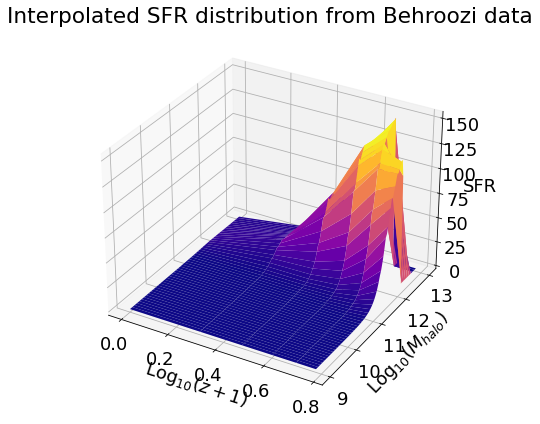

In [31]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_b, y_b, z_b, cmap="plasma")
ax.set_ylabel(r'$\rm{Log}_{10}$($M_{halo}$)')
ax.set_xlabel(r'$\rm{Log}_{10}$($z+1$)')
ax.set_zlabel('SFR')
ax.set_title('Interpolated SFR distribution from Behroozi data')
plt.show()

In [32]:
x_d = np.log10(z + 1)
y_d = np.log10(M_halos)
x_d, y_d = np.meshgrid(x_d, y_d)
z_d = np.transpose(np.array(sfr_d))

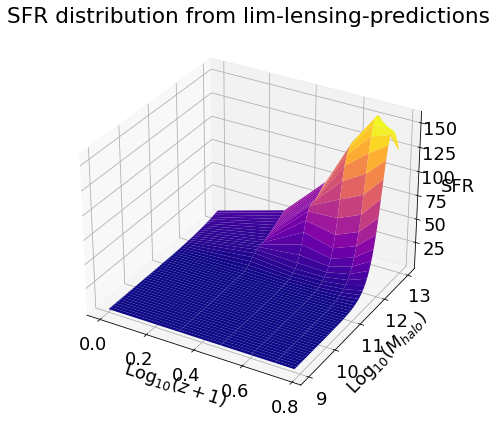

In [33]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_d, y_d, z_d, cmap = 'plasma')
#ax.set_ylim([9, 12])
ax.set_ylabel(r'$\rm{Log}_{10}$($M_{halo}$)')
ax.set_xlabel(r'$\rm{Log}_{10}$($z+1$)')
ax.set_zlabel('SFR')
ax.set_title('SFR distribution from lim-lensing-predictions')

plt.show()

/tmp/ipykernel_164216/3553016372.py:4: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot_surface(x_d, y_d, (z_d-z_b)/(z_b))
/cita/modules/python/3.10.2/lib/python3.10/site-packages/mpl_toolkits/mplot3d/axes3d.py:1754: RuntimeWarning: invalid value encountered in subtract
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
/cita/modules/python/3.10.2/lib/python3.10/site-packages/mpl_toolkits/mplot3d/axes3d.py:1753: RuntimeWarning: invalid value encountered in subtract
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/cita/modules/python/3.10.2/lib/python3.10/site-packages/numpy/core/numeric.py:1659: RuntimeWarning: invalid value encountered in subtract
  cp1 -= tmp
/cita/modules/python/3.10.2/lib/python3.10/site-packages/mpl_toolkits/mplot3d/proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


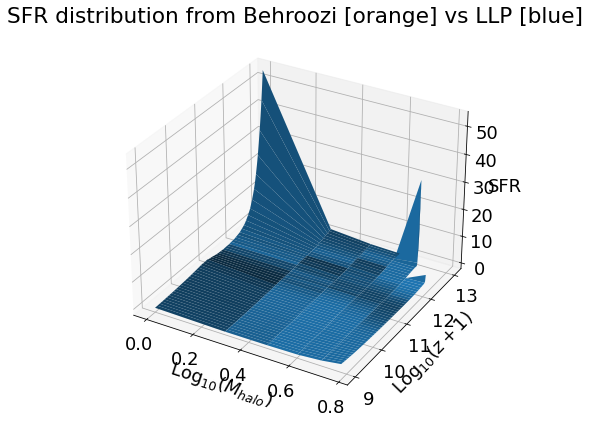

In [34]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_d, y_d, (z_d-z_b)/(z_b))
#ax.plot_surface(x_b, y_b, np.log10(z_b))
ax.set_xlabel(r'$\rm{Log}_{10}$($M_{halo}$)')
ax.set_ylabel(r'$\rm{Log}_{10}$($z+1$)')
ax.set_zlabel('SFR')
ax.set_title('SFR distribution from Behroozi [orange] vs LLP [blue]')

plt.show()

/tmp/ipykernel_164216/1455217781.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.pcolormesh(x_d, y_d, (z_d-z_b)/(z_b), cmap = plt.cm.PiYG, vmax=1)


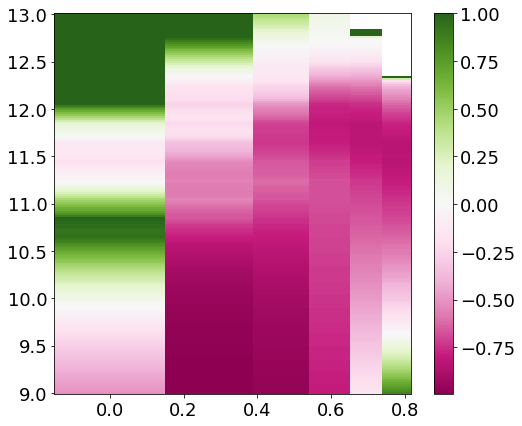

In [35]:
plt.pcolormesh(x_d, y_d, (z_d-z_b)/(z_b), cmap = plt.cm.PiYG, vmax=1)
plt.colorbar()

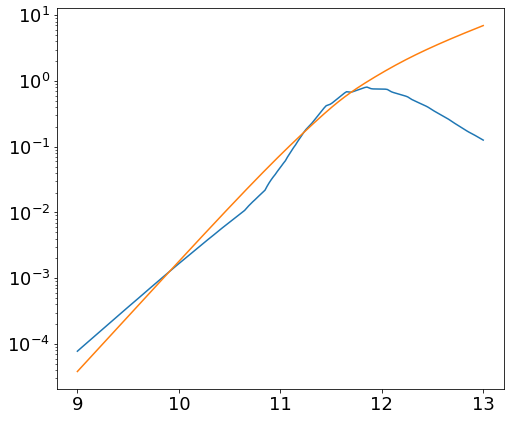

In [36]:
plt.plot(np.log10(M_halos), z_b[:,0])
plt.plot(np.log10(M_halos), z_d[:,0])
plt.yscale('log')

Gotta make sure the computations/variables are right. Re-running everything makes it look like the LLP SFR model is actually of the same scale as that of the Behroozi one. Gotta re-check things are in order.

Re-ran from log(mass) 9 to 13 and no quench: LLP quasi similar as Behroozi with tensions in the low redshift high halo mass regime.

## Implementing New Tool Idea: from SFR to $\rm{L_{[CII]}}$ luminosity

In [37]:
# M_halos, z = halo masses and redshift range

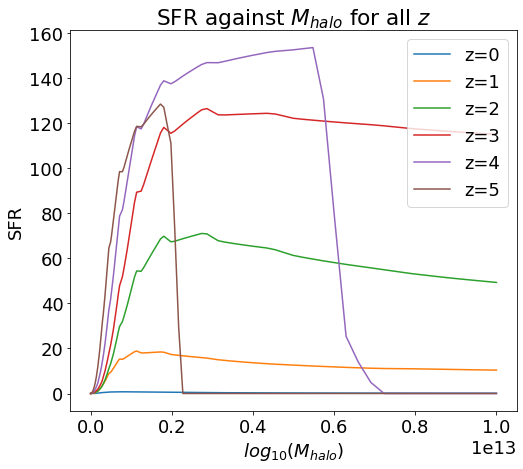

In [38]:
for i in range(len(z)):
    plt.plot(M_halos, sfr[i], label = 'z='+str(i))
    plt.legend()
    plt.xlabel(r'$log_{10}$($M_{halo}$)')
    plt.ylabel(r'SFR')
    plt.title(r'SFR against $M_{halo}$ for all $z$')

Work for now at one specific redhsift and use Behroozi SFR

The idea is to pick out the halo mass ${M_{h}}^*$ that corresponds to a SFR = 1. If the SFR doesn't reach 1 (as for $z$=0), then pick the halo mass that corresponds to the highest SFR.

Text(0.5, 1.0, 'SFR against $M_{halo}$ for $z$ = 0')

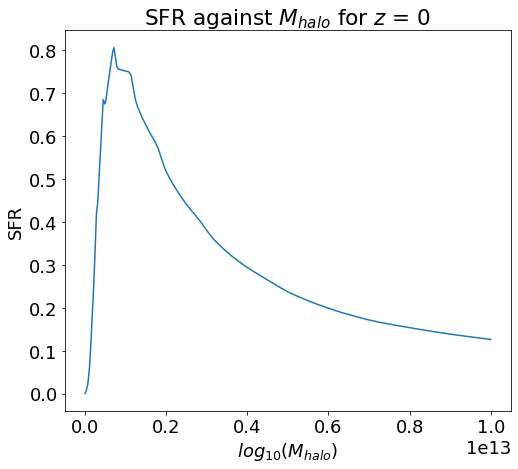

In [39]:
plt.plot(M_halos, sfr[0])
plt.xlabel(r'$log_{10}$($M_{halo}$)')
plt.ylabel(r'SFR')
plt.title(r'SFR against $M_{halo}$ for $z$ = 0')

Pick index of maximum SFR (SFR*):

In [40]:
armax = np.argmax(sfr[0])
armax

142

Extract ${M_{h}}^*$:

In [41]:
M_halo_t = M_halos[np.argmax(sfr[0])]
M_halo_t

714942898659.7562

Then the CII luminosity corresponding to that ${M_{h}}^*$ is 10⁷$\cdot$ SFR*, where SFR* will be 1 for all redshifts but $z$=0 where it will be about 0.8

In [42]:
L_CII_t = (10**7)*(np.max(sfr[0]))
L_CII_t

8064642.223992515

From the Paco paper, we have a relationship which allows us to find $M_{H1}$ given the halo mass ${M_{h}}^*$

In [43]:
MH1_t = MH1_fit(M_halos[np.argmax(sfr[0])], (4.3*(10**10)), (2*(10**12)), (0.24))
MH1_t

8011823286.908884

Then the proportion index $\alpha$ between $M_{H1}$ and $L_{[CII]}$ is $L_{[CII]}/M_{HI}$

In [44]:
alpha_t = L_CII_t/MH1_t
alpha_t

0.0010065926238250831

Then, multiply the halo mass range by alpha to get the CII luminosity across all halo masses

In [45]:
L_CII = alpha_t*MH1_z0

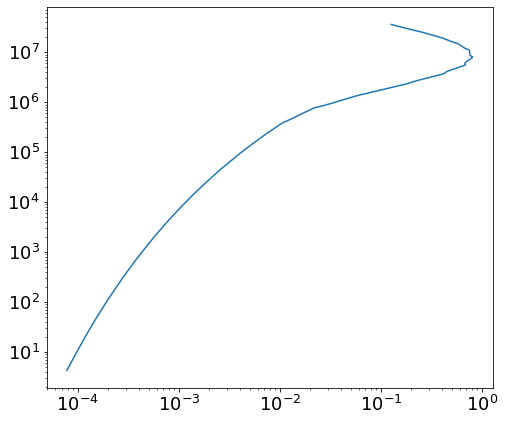

In [46]:
plt.plot(sfr[0], L_CII)
plt.xscale('log')
plt.yscale('log')

In [47]:
diff = np.absolute(1 - sfr[5])
arone = np.argmin(diff)

In [48]:
sfr[5][arone]

1.0348483514271718

In [ ]:
L_CII_z5t = (10**7)*(sfr[5][arone])
alpha_z5 = L_CII_z5t/MH1_z5[arone] 
L_CII_z5 = alpha_z5*MH1_z5

In [54]:
alpha_z5

0.005338064206833082

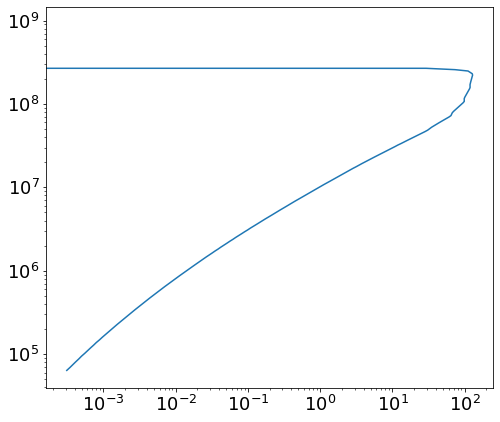

In [50]:
plt.plot(sfr[5], L_CII_z5)
plt.xscale('log')
plt.yscale('log')

/tmp/ipykernel_164216/3333661418.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot((10**10)*sfr[5], L_CII_z5/(sfr[5]*(10**10)))


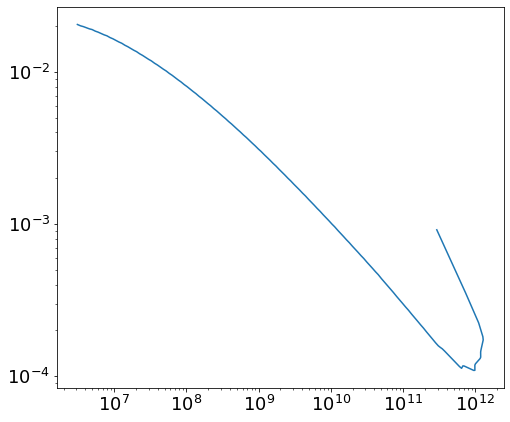

In [51]:
plt.plot((10**10)*sfr[5], L_CII_z5/(sfr[5]*(10**10)))
plt.yscale('log')
plt.xscale('log')

In [52]:
sfr_5t = llm.add_log_normal_scatter(sfr[5], 0.3)
L_CII_5t = llm.add_log_normal_scatter(L_CII_z5, 0.3)

/tmp/ipykernel_164216/3762227887.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot((10**10)*sfr_5t, L_CII_5t/(sfr_5t*(10**10)), '.k')


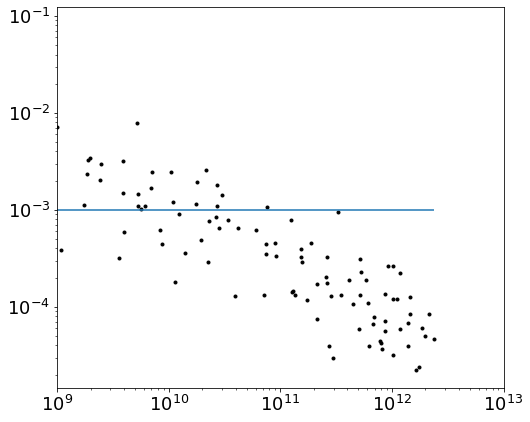

In [53]:
plt.plot((10**10)*sfr_5t, L_CII_5t/(sfr_5t*(10**10)), '.k')
plt.hlines(y = (10**(-3)), xmin = np.min((10**10)*sfr_5t), xmax = np.max((10**10)*sfr_5t))
plt.xlim([10**9, 10**13])
plt.yscale('log')
plt.xscale('log')